# Часть 3. Задача кластеризации

Датасет: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Для представленного датасета необходимо решить задачу кластеризации методом k-средних. При решении задачи необходимо ответить на следующие вопросы:
1. Как выбор начальных центров кластеров влияет на результат кластеризации?
2. Какую метрику выбрать для оценки качества кластеризации?

Задание выполнил: Никита Пархоменко

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize': (12, 12)})

**Смысл признаков:**

CUST_ID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFF_PURCHASES : Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES : Amount of purchase done in installment

CASH_ADVANCE : Cash in advance given by the user

PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASES_TRX : Numbe of purchase transactions made

CREDIT_LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

---

Task: **Clusterization**

Goal: Customer Segmentation to define marketing strategy

## Решение

In [ ]:
df = pd.read_csv('gdrive/My Drive/ml_task_hse/task3_data/CC GENERAL.csv', sep=';')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
(df['PAYMENTS'] / df['MINIMUM_PAYMENTS']).mean()

9.350070123832545

In [ ]:
# Fix NaN values

df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['PAYMENTS'] / (df['PAYMENTS'] / df['MINIMUM_PAYMENTS']).mean())

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,835.188900,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2335.908386,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.205604,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,290.512102,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,790.308125,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# Уберем неинформативную колонку

df = df.drop('CUST_ID', axis=1)

<Axes: >

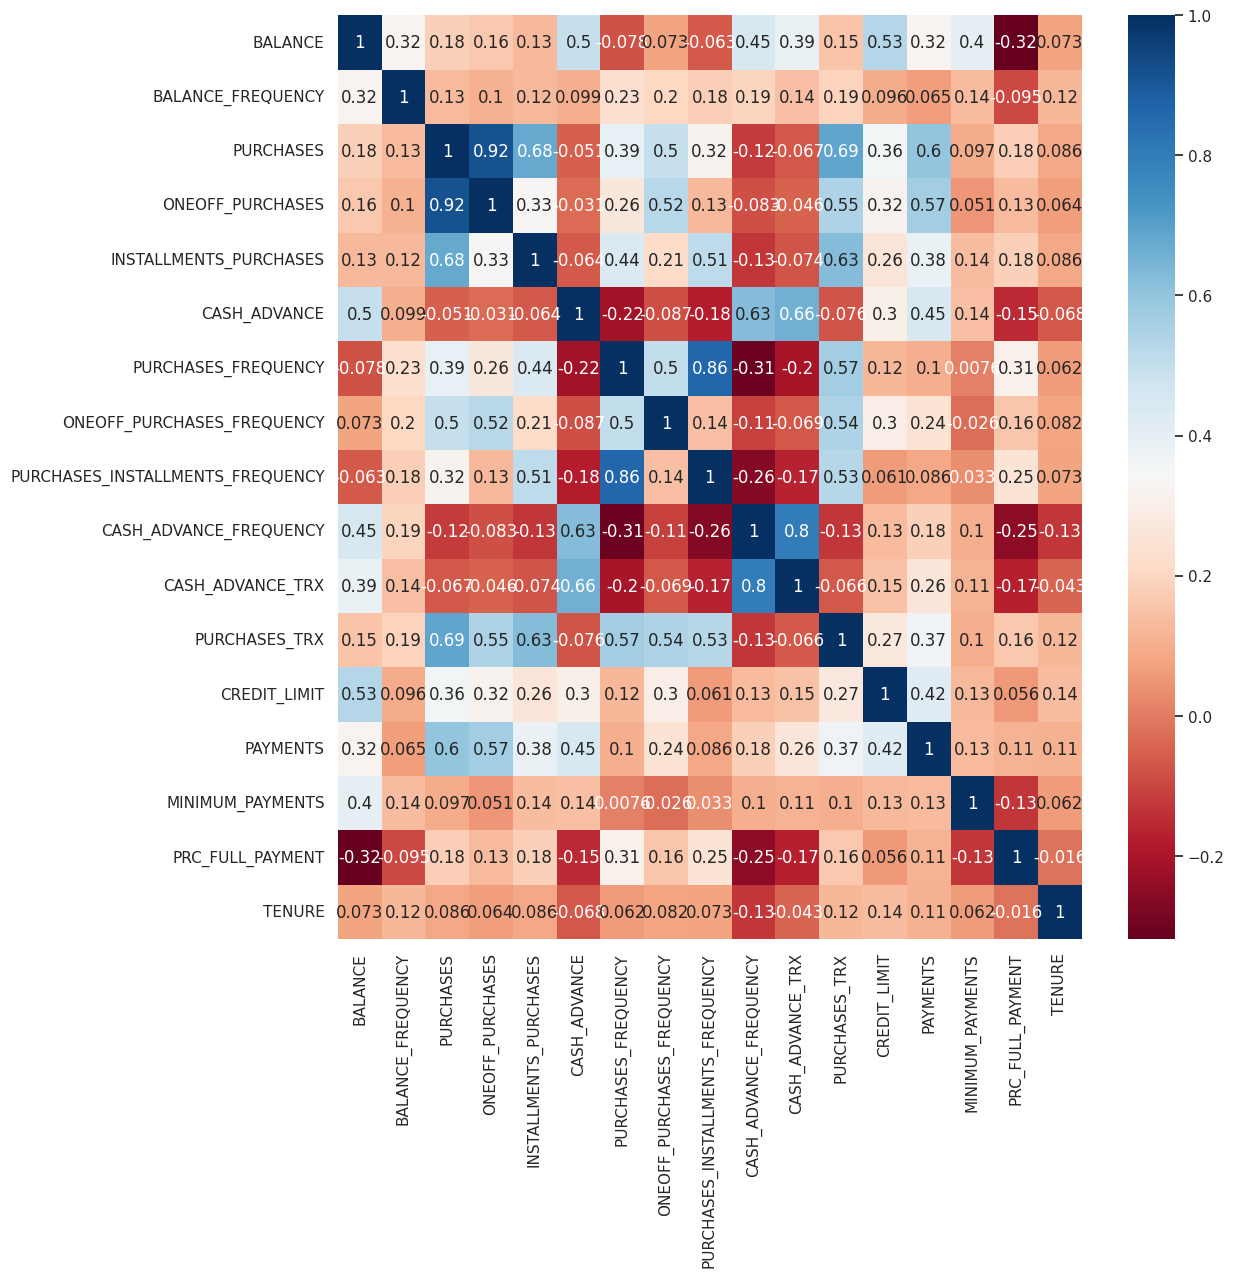

In [ ]:
# Посмотрим на матрицу корреляции (все признаки вещественные)

sns.heatmap(df.corr(), cmap="RdBu", annot=True)

Сильно коррелирующие между собой признаки стоит убрать из выборки (один из пары). Установим порог корреляции 0.8, если корреляция между признаками превышает 0.8, эти признаки будут удалены

In [ ]:
corr_matrix = df.corr().abs()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
to_drop

['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY']

In [ ]:
# Удалим сильно коррелирующие колонки (по одной из пары)

df = df.drop(to_drop, axis=1)

In [ ]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,291.12,0.000000,1.000000,0.000000,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,300.00,0.000000,1.000000,0.000000,0.000000,0,6,1000.0,275.861322,29.503663,0.000000,6
8947,23.398673,0.833333,144.40,144.40,0.000000,0.833333,0.000000,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,36.558778,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
features = list(df.columns)
print(*features, sep='\n')

BALANCE
BALANCE_FREQUENCY
PURCHASES
INSTALLMENTS_PURCHASES
CASH_ADVANCE
PURCHASES_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY
CASH_ADVANCE_FREQUENCY
CASH_ADVANCE_TRX
PURCHASES_TRX
CREDIT_LIMIT
PAYMENTS
MINIMUM_PAYMENTS
PRC_FULL_PAYMENT
TENURE


In [ ]:
len(features)

15

В задаче кластеризации также важно обрабатывать выбросы (outliers). Будем действовать так: определим верхние и нижние пороговые значения для каждого признака, и при выход значения признака за их пределы будем делать замену на пороговое значение.

In [ ]:
def get_col_thresholds(df, col, low_quantile=0.1, up_quantile=0.9):
  quantile_one = df[col].quantile(low_quantile)
  quantile_three = df[col].quantile(up_quantile)
  interquantile_range = quantile_three - quantile_one
  low_threshold = quantile_one - 1.5 * interquantile_range
  up_threshold = quantile_three + 1.5 * interquantile_range
  return low_threshold, up_threshold


def replace_col_with_thresholds(df, col):
  low_threshold, up_threshold = get_col_thresholds(df, col)
  df.loc[(df[col] < low_threshold), col] = low_threshold
  df.loc[(df[col] > up_threshold), col] = up_threshold
  return df

In [ ]:
for col in df.columns:
  df = replace_col_with_thresholds(df, col)

Проведем стандартизацию вещественных признаков.

In [ ]:
X_scaler = StandardScaler()
X = X_scaler.fit_transform(df)

In [ ]:
X.shape

(8950, 15)

In [ ]:
len(features)

15

### Кластеризация K-Means

Переберем различные параметры k (количество кластеров). Постараемся найти оптимальное количество кластеров.

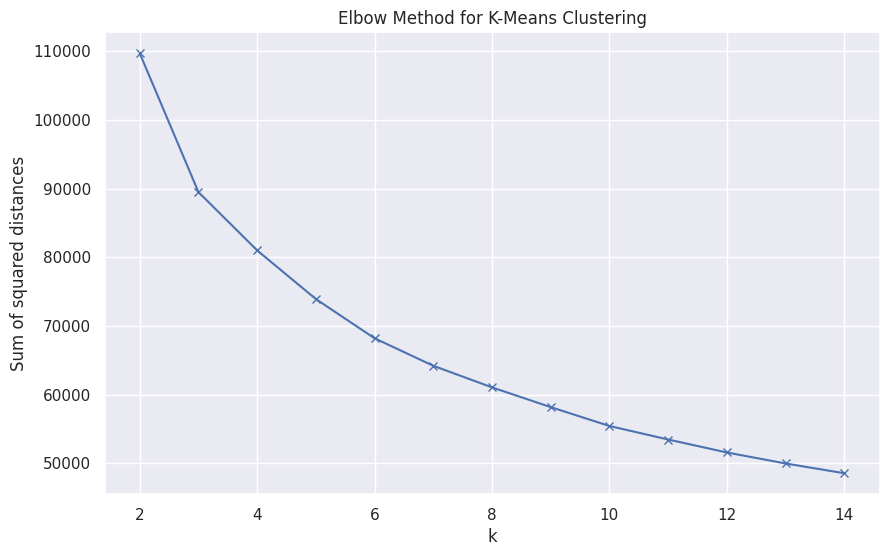

In [ ]:
from sklearn.cluster import KMeans

sum_of_squared_distances = []
for k in range(2,15):
  km = KMeans(n_clusters=k, random_state=42)
  km = km.fit(X)
  sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2,15), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for K-Means Clustering')
plt.show()

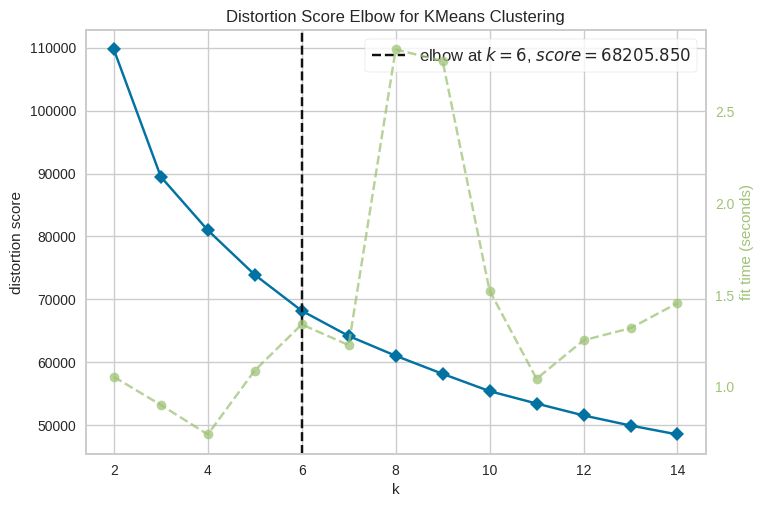

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state=42)
elbow = KElbowVisualizer(km, k=(2, 15))
elbow.fit(X)
elbow.show()

Найдем количество кластеров, при котором **Average Silhouette Score** минимально - это и будет оптимальным значением K в алгоритме K-Means применительно к нашей задаче.

Silhouette Score вычисляется с помощью среднего внутрикластерного расстояния (a) и среднего расстояния до ближайшего кластера (b) по каждому объекту из выборки. Силуэт вычисляется как (b - a) / max(a, b).

Можно вычислить среднее значение (Average Silhouette Score) по всем объектам и использовать его в качестве внутренней метрики оценки качества кластеризации (что также поможет выбрать оптимальное k).

Таким образом, **Average Silhouette Score** - отличная метрика для внутренней оценки качества кластеризации.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_scores = {}

for k in range(2,15):
  km = KMeans(n_clusters=k, random_state=42)
  labels = km.fit_predict(X)
  silhouette_scores[k] = silhouette_score(X, labels)

silhouette_scores = dict(sorted(silhouette_scores.items(), key=lambda item: item[1]))
silhouette_scores

{4: 0.16995568652784798,
 10: 0.1808973542583289,
 5: 0.18156842505176113,
 9: 0.18562090479253865,
 13: 0.18634092736541288,
 11: 0.1885654777796075,
 14: 0.18911005864269614,
 12: 0.19118987211761032,
 6: 0.1951115259132668,
 7: 0.19597544104555062,
 8: 0.19779904044943686,
 3: 0.2717038200677336,
 2: 0.27366557308776635}

Таким образом, оптимальным является использование **K=4** кластеров при решении задачи методом K-Means.

In [ ]:
km = KMeans(n_clusters=4, random_state=42)
labels = km.fit_predict(X)
silhouette_avg = silhouette_score(X, labels)
silhouette_avg

0.16995568652784798

Сделаем визуализацию нашей кластеризации, снизив размерность данных до 2 для отрисовки 2D-графика. Воспользуемся для этого методом главных компонент (PCA).

In [ ]:
km = KMeans(n_clusters=4, random_state=42)
labels = km.fit_predict(X)

df['cluster'] = labels
df['cluster'] = df['cluster'] + 1

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.000000,0,2.0,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,4,0.0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0,12.0,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.083333,1,1.0,7500.0,0.000000,0.000000,0.000000,12,2
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0,1.0,1200.0,678.334763,244.791237,0.000000,12,2


In [ ]:
df.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,
1,4338.960374,0.965977,477.180599,174.426683,3835.139214,0.289879,0.130113,0.459369,11.982988,7.120192,7226.704545,2999.812796,1524.725432,0.035990,11.455621
2,935.888069,0.772576,219.527105,63.098191,555.352565,0.182551,0.065044,0.114469,2.062220,2.778276,3084.116355,840.566193,434.881012,0.070264,11.405220
3,2705.911800,0.983148,4265.454801,1592.210751,529.026895,0.951604,0.658157,0.070396,1.691067,58.684243,8317.928040,4424.904109,1104.447103,0.268203,11.933002
4,764.569065,0.941238,1041.744011,518.955595,140.468055,0.846053,0.286395,0.032125,0.568856,18.728243,4009.043099,1143.864483,463.811360,0.281562,11.643214


In [ ]:
from sklearn.decomposition import PCA

X, y = df.drop('cluster', axis=1), df['cluster']


def pca_transform(X, y):
  X = StandardScaler().fit_transform(X)
  pca = PCA(n_components=2)
  pca_data = pd.DataFrame(data=pca.fit_transform(X), columns=['PC1', 'PC2'])
  pca_data = pd.concat([pca_data, pd.DataFrame(y)], axis=1)
  return pca_data

pca_data = pca_transform(X, y)
pca_data.head()

,PC1,PC2,cluster
0,-1.826746,-1.242684,2
1,-0.768344,2.984634,1
2,1.288855,-0.685335,4
3,-1.076307,-0.436251,2
4,-1.634850,-0.843969,2


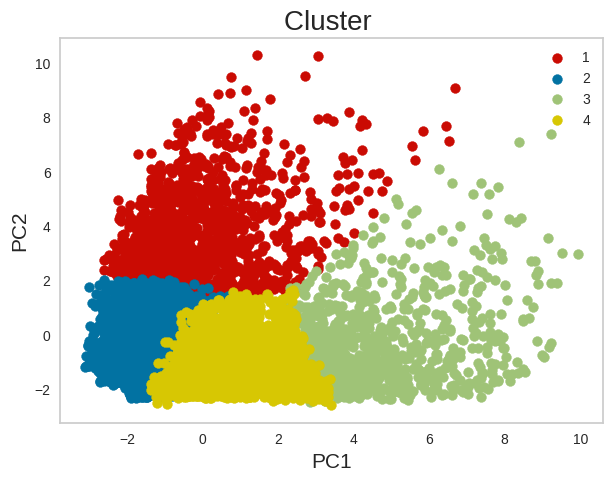

In [ ]:
# Визуализация кластеризации по главным компонентам
def plot_pca_clustering(df, target, metrics=None):
  fig = plt.figure(figsize=(7, 5))
  ax = fig.add_subplot(1, 1, 1)
  ax.set_xlabel('PC1', fontsize=15)
  ax.set_ylabel('PC2', fontsize=15)
  if metrics:
    ax.set_title(f'{target.capitalize()} (silhouette_avg = {round(metrics, 3)})', fontsize=20)
  else:
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

  targets = sorted(list(df[target].unique()))
  colors = ['r', 'b', 'g', 'y']


  for t, color in zip(targets, colors):
    indices = df[target] == t
    ax.scatter(df.loc[indices, 'PC1'], df.loc[indices, 'PC2'], c=color, s=50)
  ax.legend(targets)
  ax.grid()
  plt.show()

plot_pca_clustering(pca_data, 'cluster')

По графику видно, что кластеризация проходит достаточно качественно, и 4 кластера для это - оптимальное количество.

Теперь оценим, как выбор начальных центров кластеров влияет на результат кластеризации. Отметим, что алгоритм довольно чувствителен к этому.

Для этого будем задавать начальные центры кластеров случайным образом (init='random').

In [ ]:
def randomize_kmeans_centroids(df, ):
  km = KMeans(n_clusters=4, init='random')
  X = StandardScaler().fit_transform(df)
  labels = km.fit_predict(X)
  silhouette_avg = silhouette_score(X, labels)

  df['cluster'] = labels
  df['cluster'] = df['cluster'] + 1

  X, y = df.drop('cluster', axis=1), df['cluster']
  pca_data = pca_transform(X, y)
  plot_pca_clustering(pca_data, 'cluster', metrics=silhouette_avg)

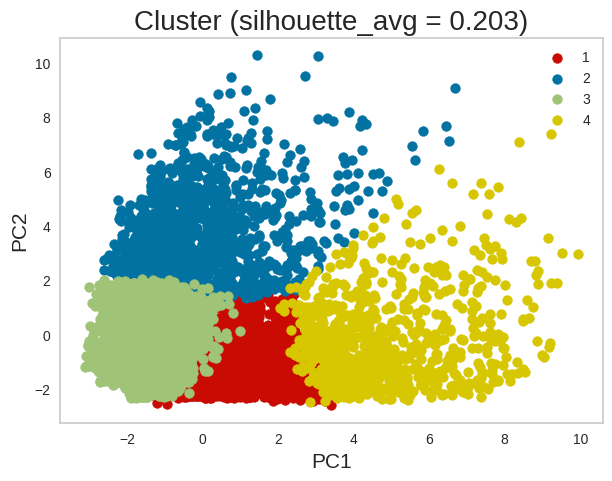

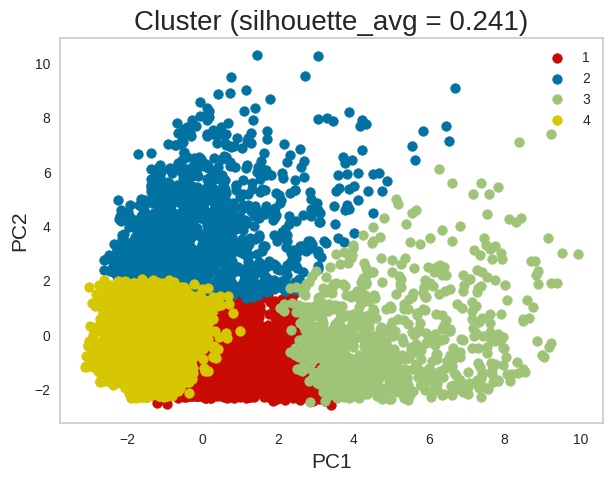

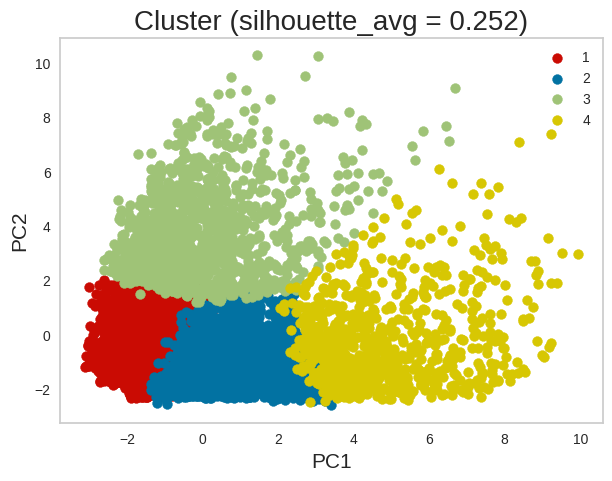

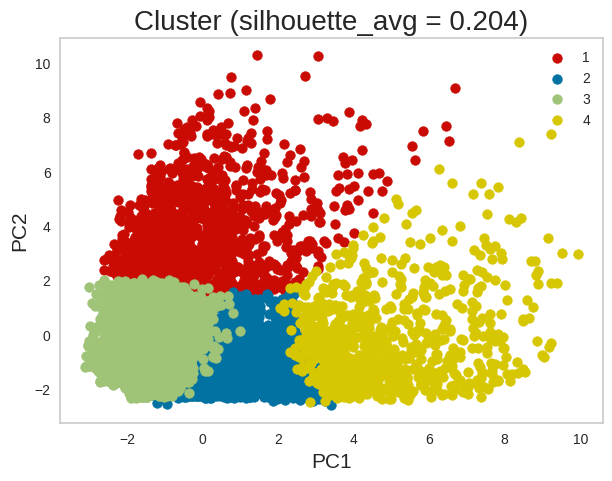

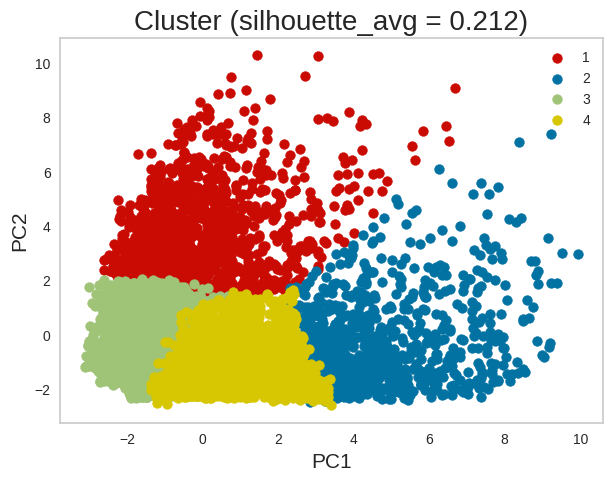

In [ ]:
for i in range(5):
  randomize_kmeans_centroids(df)

Как видим, изменение начальных центров кластеров может влиять на то, какая метка какому именно кластеру "достанется", также может быть некоторое (но не сильное) изменение формы кластеров.